In [21]:
%%time
#Libraries import
#pip install imblearn --user
#!pip install tflearn
#importing some basic libraries
#!pip install scikit-image
!pip install langdetect
!pip install tqdm
import os
from pathlib import Path
from zipfile import ZipFile as zf
import skimage.io as io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import warnings
import random
from random import randint
import pickle
warnings.simplefilter("ignore")
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,roc_auc_score
from langdetect import detect
from tqdm.notebook import tqdm
from keras.utils import to_categorical
from keras import models
from keras import layers
import math
import re
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from imblearn.over_sampling import SMOTE

CPU times: total: 15.6 ms
Wall time: 5.19 s


In [2]:
print("pandas version: ",pd.__version__)
#from google.colab import drive
#drive.mount('/content/drive')

pandas version:  1.5.0


## PART A 
DOMAIN: Digital content and entertainment industry

CONTEXT: The objective of this project is to build a text classification model that analyses the customer's
sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build
an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

#### Steps and tasks: [Total Score: 30 Marks]

#### Solution 1. Import and analyse the data set. [5 Marks]
Hint: - Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [3]:
top_words = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 4s 0us/step


#### To prove we have limited ourselves to the 10,000 most frequent words we will iterate over all the reviews and check the maximum value.

In [4]:

print(max([max(review) for review in x_train]))

9999


### The dataset comes preprocessed. Each example is an array of integers representing the words of the movie review. Each label is either a "0" for negative or "1" for positive.

In [5]:
print(x_train[0])
print(y_train)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1 0 0 ... 0 1 0]


In [6]:
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))
print(len(y_test[y_test==1]))
print(len(y_test[y_test==0]))

12500
12500
12500
12500


Data is in balance

### Solution 2. Perform relevant sequence adding on the data. [5 Marks]

In [7]:
#created method to perform relevant sequence adding on the data
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
#consolidating data for EDA
data = np.concatenate((x_train, x_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)
#Adding sequence to data
data = vectorize(data)
label = np.array(label).astype("float32")
print(label)

[1. 0. 0. ... 0. 0. 0.]


#### 3. Perform following data analysis: [5 Marks]
• Print shape of features and labels

• Print value of any one feature and it's label

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_train[0])
print(y_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [10]:
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0. 1.]
Number of unique words: 2


In [11]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 10000.0
Standard Deviation: 0


<AxesSubplot:xlabel='label', ylabel='count'>

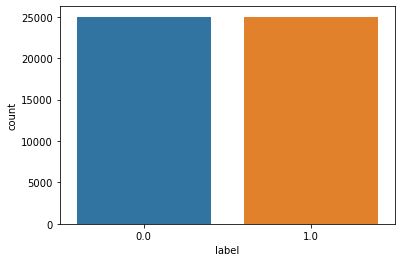

In [12]:
#check the distribution of labels
sns.countplot(x='label', data=pd.DataFrame({'label':label}))

#### Data above is evenly distributed

#### Solution 4. Decode the feature value to get original sentence [5 Marks]

#### We will get the dictionary from tf.keras.datasets.imdb.get_word_index which hashes the words to their corresponding integers. We will then try to convert a review from integers back into it's original text by first reversing this dictionary and then iterating over a review and converting the integers to strings.

In [13]:
# Dictionary that hashes words to their integer
word_to_integer = tf.keras.datasets.imdb.get_word_index()

# Print out the first twenty keys in the dictionary
print(list(word_to_integer.keys())[0:20])

integer_to_word = dict([(v, k) for (k, v) in word_to_integer.items()])

# Demonstrate how to find the word from an integer
print(integer_to_word[1])
print(integer_to_word[2])

# Will be subtracting 3 from the indices because 0 is "padding", 1 is "start of sequence", and 2 is "unknown"
decoded_review = ' '.join([integer_to_word.get(i - 3, 'UNK') for i in x_train[0]])
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling', "hold's", 'comically', 'localized', 'disobeying', "'royale", "harpo's", 'canet', 'aileen', 'acurately', "diplomat's"]
the
and
UNK this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert UNK is an amazing actor and now the same being director UNK father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for UNK and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also UNK to the two litt

#### Solution 5. Design, train, tune and test a sequential model. [5 Marks]
Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be
analytical and experimental here in trying new approaches to design the best model.

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data,label, test_size=0.30, random_state=1)

In [19]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(35000, 10000)
(35000,)
(15000, 10000)
(15000,)


In [22]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [25]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [26]:
results = model.fit(Xtrain, ytrain, epochs= 100, batch_size = 40, validation_data = (Xtest, ytest), callbacks=[callback])

Epoch 1/100
875/875 [==============================] - 4s 4ms/step - loss: 0.3272 - accuracy: 0.8618 - val_loss: 0.2667 - val_accuracy: 0.8907
Epoch 2/100
875/875 [==============================] - 3s 3ms/step - loss: 0.1990 - accuracy: 0.9230 - val_loss: 0.2848 - val_accuracy: 0.8877
Epoch 3/100
875/875 [==============================] - 3s 3ms/step - loss: 0.1358 - accuracy: 0.9498 - val_loss: 0.3246 - val_accuracy: 0.8855
Epoch 4/100
875/875 [==============================] - 3s 3ms/step - loss: 0.0969 - accuracy: 0.9648 - val_loss: 0.3620 - val_accuracy: 0.8846
Epoch 5/100
875/875 [==============================] - 3s 3ms/step - loss: 0.0737 - accuracy: 0.9738 - val_loss: 0.4202 - val_accuracy: 0.8828
Epoch 6/100
875/875 [==============================] - 3s 3ms/step - loss: 0.0599 - accuracy: 0.9779 - val_loss: 0.5165 - val_accuracy: 0.8797
Epoch 7/100
875/875 [==============================] - 3s 3ms/step - loss: 0.0508 - accuracy: 0.9801 - val_loss: 0.5175 - val_accuracy: 0.8805

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


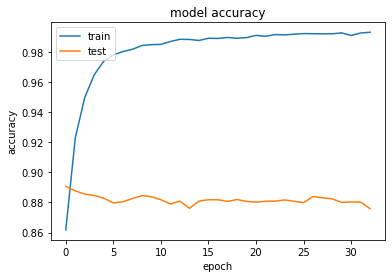

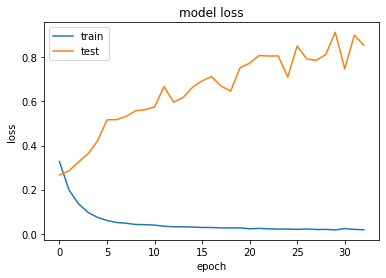

In [27]:
#Let's plot training history of our model

# list all data in history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model.predict(Xtest)

469/469 [==============================] - 1s 1ms/step


array([[1.3563030e-02],
       [1.0000000e+00],
       [9.1158742e-01],
       ...,
       [1.4514184e-19],
       [1.5782607e-05],
       [1.0000000e+00]], dtype=float32)

In [ ]:
INDEX_START=1

def preprocess_imdb(review):
    # clean and tokenize
    words_list = text_to_word_sequence(review)
    # init array
    words_index_list = []
    # INDEX_START as first element in sequence (keras convention)
    words_index_list.append(INDEX_START)
    #words_index_list[0] = INDEX_START

In [ ]:
%%time
drive_folder = '/content/drive/MyDrive/ML_Project/NLP/Project2/'
zip_filename = 'glove.6B.zip'
directory_to_extract_to = '/content/data' 
# Path
location = "."
path = os.path.join(location, directory_to_extract_to)
try:
    for root, dirs, files in os.walk(path, topdown=False):
        for name in files:
            os.remove(os.path.join(root, name))
        for name in dirs:
            os.rmdir(os.path.join(root, name))
            
    print("clearing directory '%s'"%(path))
except Exception as e:
    print(e)
os.mkdir(path)
if os.path.exists(path):
    with zf(os.path.join(drive_folder, zip_filename), 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)
        
print("% s files extracted successfully" % directory_to_extract_to)      


clearing directory '/content/data'
/content/data files extracted successfully
